In [41]:
# Wczytanie danych
import pandas as pd

df1 = pd.read_csv("df1.csv")
df2 = pd.read_csv("df2.csv")

# Połączenie obu ram danych
combined_df = pd.merge(df1, df2, on='EmployeeNumber', how='inner')

#wywalenie Attrition tam gdzie sa NaN
combined_df.dropna(subset=["Attrition"], inplace=True)
assert combined_df["Attrition"].isna().sum()==0, "Kolumna Attrition nie jest poprawnie wypelniona"

# Wyświetlenie kilku pierwszych wierszy ramki danych
combined_df.head()



,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [42]:
# Instalacja pakietu pandas-profiling (jeśli jeszcze nie jest zainstalowany)
!pip install -U ydata-profiling[notebook]==4.0.0 matplotlib==3.5.1



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

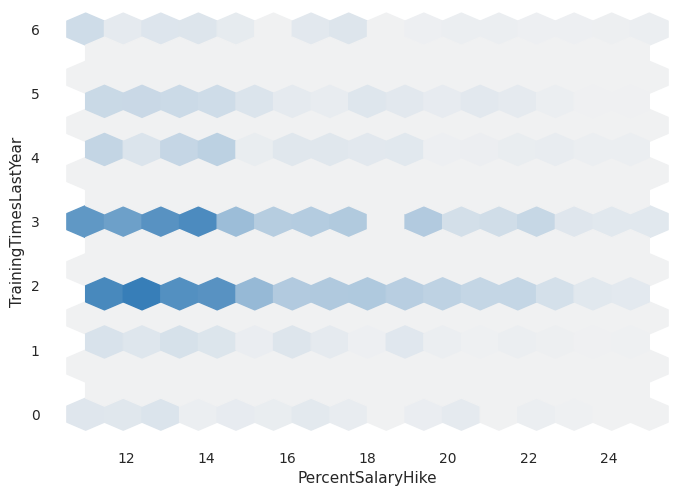

In [43]:
# Importowanie biblioteki niezbędnej do raportu
from pandas_profiling import ProfileReport

# Generowanie raportu
profile = ProfileReport(combined_df, title="Report", explorative=True)

# Zapisanie raportu do pliku HTML
profile.to_file("Report")

In [44]:
# Lista kolumn zawierających informacje o latach
columns_to_convert = ['DistanceFromHome', 'JobSatisfaction', 'MonthlyIncome',
                      'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
                      'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Konwersja kolumn na format liczbowy
combined_df[columns_to_convert] = combined_df[columns_to_convert].astype(float)

# Sprawdzenie typów danych w kolumnach, aby potwierdzić dokonaną konwersję
print(combined_df.dtypes)

EmployeeNumber                int64
Age                         float64
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                   float64
EducationField               object
EmployeeCount               float64
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            float64
TotalWorkingYears           

In [45]:
# Wybierz tylko rekordy, gdzie Attrition to "No"
subset_df = combined_df[combined_df['Attrition'] == 'No']

In [46]:
#Hipoteza: satysfakcja, zarobki i bezp. przełożony mogą najmocniej oddziaływać
# Wybierz kolumny do analizy
columns_to_analyze = ["MonthlyIncome", "JobSatisfaction", "EnvironmentSatisfaction", "YearsWithCurrManager", "WorkLifeBalance"]

# Utwórz podzbiór danych zawierający wybrane kolumny
subset_df = combined_df[columns_to_analyze]

In [47]:
# Oblicz macierz korelacji dla podzbioru danych
correlation_matrix = subset_df.corr()

# Wybierz kolumnę korelacji z Attrition = "No" (ostatnia kolumna), a następnie posortuj wartości
correlation_with_attrition_no = correlation_matrix.iloc[:-1, -1].sort_values()

# Wyświetl wyniki
print(correlation_with_attrition_no)


JobSatisfaction           -0.009786
YearsWithCurrManager      -0.006414
EnvironmentSatisfaction    0.030238
MonthlyIncome              0.036584
Name: WorkLifeBalance, dtype: float64


In [51]:
from sklearn.model_selection import train_test_split

# Podział na zbiór treningowy i testowy dla danych rzeczywistych
X_train, X_test, y_train, y_test = train_test_split(
    combined_df,  # X zawiera wszystkie kolumny
    combined_df['Attrition'],  # y to kolumna Attrition
    train_size=0.8,
    random_state=42,
    stratify=combined_df['Attrition']  # zachowuje proporcje klas w zbiorze y
)

# Informacje o kształcie zbiorów treningowych i testowych
print("Zbiór treningowy:", X_train.shape, y_train.shape)
print("Zbiór testowy:", X_test.shape, y_test.shape)

# Zestaw toy dla danych rzeczywistych
X_toy_train, X_toy_test, y_toy_train, y_toy_test = train_test_split(
    combined_df,  # X zawiera wszystkie kolumny
    combined_df['Attrition'],  # y to kolumna Attrition
    train_size=0.8,
    random_state=42,
    stratify=combined_df['Attrition']  # zachowuje proporcje klas w zbiorze y
)

# Informacje o kształcie zbioru toy
print("Zestaw toy:", X_toy_train.shape, y_toy_train.shape)


Zbiór treningowy: (3441, 36) (3441,)
Zbiór testowy: (861, 36) (861,)
Zestaw toy: (3441, 36) (3441,)
